In [97]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/weather-predictions/Weather Station Locations.csv
/kaggle/input/weather-predictions/Summary of Weather.csv


In [98]:
#IMPORT LIBRARIES
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [99]:
#IMPORT DATASET
data = pd.read_csv("../input/weather-predictions/Summary of Weather.csv")
data.head()

,STA,Date,Precip,WindGustSpd,MaxTemp,MinTemp,MeanTemp,Snowfall,PoorWeather,YR,...,FB,FTI,ITH,PGT,TSHDSBRSGF,SD3,RHX,RHN,RVG,WTE
0,10001,01-07-1942,1.016,NaN,25.555556,22.222222,23.888889,0,NaN,42,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,10001,02-07-1942,0,NaN,28.888889,21.666667,25.555556,0,NaN,42,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,10001,03-07-1942,2.54,NaN,26.111111,22.222222,24.444444,0,NaN,42,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,10001,04-07-1942,2.54,NaN,26.666667,22.222222,24.444444,0,NaN,42,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,10001,05-07-1942,0,NaN,26.666667,21.666667,24.444444,0,NaN,42,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [100]:
data.shape

(119040, 31)

In [101]:
data.columns

Index(['STA', 'Date', 'Precip', 'WindGustSpd', 'MaxTemp', 'MinTemp',
       'MeanTemp', 'Snowfall', 'PoorWeather', 'YR', 'MO', 'DA', 'PRCP', 'DR',
       'SPD', 'MAX', 'MIN', 'MEA', 'SNF', 'SND', 'FT', 'FB', 'FTI', 'ITH',
       'PGT', 'TSHDSBRSGF', 'SD3', 'RHX', 'RHN', 'RVG', 'WTE'],
      dtype='object')

In [102]:
data.index

RangeIndex(start=0, stop=119040, step=1)

In [103]:
#CHECKING MISSING VALUES
data.info
data.isnull().sum()

STA                 0
Date                0
Precip              0
WindGustSpd    118508
MaxTemp             0
MinTemp             0
MeanTemp            0
Snowfall         1163
PoorWeather     84803
YR                  0
MO                  0
DA                  0
PRCP             1932
DR             118507
SPD            118508
MAX               474
MIN               468
MEA               498
SNF              1163
SND            113477
FT             119040
FB             119040
FTI            119040
ITH            119040
PGT            118515
TSHDSBRSGF      84803
SD3            119040
RHX            119040
RHN            119040
RVG            119040
WTE            119040
dtype: int64

In [104]:
#Removing the columns containg missing values
c = data.dropna(axis=1)

In [105]:
c

,STA,Date,Precip,MaxTemp,MinTemp,MeanTemp,YR,MO,DA
0,10001,01-07-1942,1.016,25.555556,22.222222,23.888889,42,7,1
1,10001,02-07-1942,0,28.888889,21.666667,25.555556,42,7,2
2,10001,03-07-1942,2.54,26.111111,22.222222,24.444444,42,7,3
3,10001,04-07-1942,2.54,26.666667,22.222222,24.444444,42,7,4
4,10001,05-07-1942,0,26.666667,21.666667,24.444444,42,7,5
...,...,...,...,...,...,...,...,...,...
119035,82506,27-12-1945,0,28.333333,18.333333,23.333333,45,12,27
119036,82506,28-12-1945,9.906,29.444444,18.333333,23.888889,45,12,28
119037,82506,29-12-1945,0,28.333333,18.333333,23.333333,45,12,29
119038,82506,30-12-1945,0,28.333333,18.333333,23.333333,45,12,30


In [106]:
c.isnull().sum()

STA         0
Date        0
Precip      0
MaxTemp     0
MinTemp     0
MeanTemp    0
YR          0
MO          0
DA          0
dtype: int64

In [107]:
# Separating X value
x = data.iloc[:,5:6].values
x

array([[22.22222222],
       [21.66666667],
       [22.22222222],
       [22.22222222],
       [21.66666667],
       [21.66666667],
       [22.77777778],
       [22.22222222],
       [22.77777778],
       [21.66666667],
       [21.66666667],
       [22.22222222],
       [21.66666667],
       [22.22222222],
       [22.77777778],
       [21.11111111],
       [22.22222222],
       [21.11111111],
       [21.66666667],
       [20.        ],
       [21.66666667],
       [21.11111111],
       [20.55555556],
       [18.88888889],
       [19.44444444],
       [19.44444444],
       [19.44444444],
       [19.44444444],
       [19.44444444],
       [19.44444444],
       [19.44444444],
       [20.        ],
       [20.55555556],
       [20.55555556],
       [21.11111111],
       [21.11111111],
       [21.66666667],
       [21.11111111],
       [20.55555556],
       [20.55555556],
       [21.66666667],
       [21.66666667],
       [20.55555556],
       [20.55555556],
       [20.        ],
       [17

In [108]:
#Separating Y value
y = data.iloc[:,4:5].values
y

array([[25.55555556],
       [28.88888889],
       [26.11111111],
       [26.66666667],
       [26.66666667],
       [26.66666667],
       [28.33333333],
       [26.66666667],
       [27.22222222],
       [25.55555556],
       [25.55555556],
       [24.44444444],
       [26.11111111],
       [26.11111111],
       [25.55555556],
       [26.11111111],
       [28.33333333],
       [26.66666667],
       [27.77777778],
       [26.11111111],
       [24.44444444],
       [24.44444444],
       [26.66666667],
       [27.22222222],
       [27.22222222],
       [25.55555556],
       [25.55555556],
       [26.66666667],
       [26.66666667],
       [27.22222222],
       [27.22222222],
       [26.11111111],
       [24.44444444],
       [24.44444444],
       [26.66666667],
       [26.66666667],
       [24.44444444],
       [24.44444444],
       [26.11111111],
       [26.11111111],
       [27.22222222],
       [25.        ],
       [25.55555556],
       [25.55555556],
       [25.55555556],
       [25

Text(0, 0.5, 'MAX Temp')

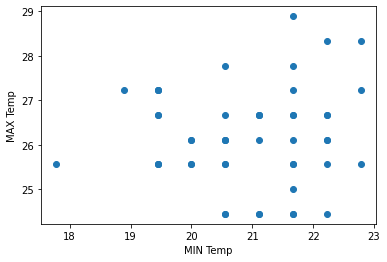

In [109]:
plt.scatter(x,y)
plt.xlabel("MIN Temp")
plt.ylabel("MAX Temp")

In [110]:
#Plotting the graph between Min and max temp we can see the points are forming a linear line type structure so the relation between min and max temperature is of linear type y=mx+c.

In [111]:
#Train & Test data
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.8)

In [112]:
#Applying Linear Regression
from sklearn.linear_model import LinearRegression
l=LinearRegression()
l.fit(x_train,y_train)

LinearRegression()

In [113]:
#Predicting data
yp=l.predict(x_test)

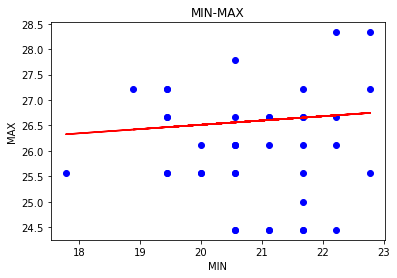

In [114]:
#Plotting the values
plt.scatter(x_test,y_test,color='blue')
plt.plot(x_test,yp,color='red')
plt.xlabel('MIN')
plt.ylabel('MAX')
plt.title('MIN-MAX')
plt.show()

In [115]:
#Yes we can predict max temperature from min temp

In [116]:
a= l.coef_
c=l.intercept_
print("y=",c,"+",a,"x")

y= [24.83288163] + [[0.08401084]] x


In [117]:
from sklearn.metrics import r2_score
r_sq = r2_score(y_test,yp)
r_sq

-0.23890944185443064